# Producing figures with multi-channel images

The ```microplot``` module contains tools to create figures containing multi-channel images. It offers basic tools to turn 2D images into RGB images using specific color maps, combine multiple channels, create figures, adding labels and scale bars.

In [1]:
#%load_ext autoreload
#%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io

from microfilm import microplot

## Basic plotting with ```microshow```

The ```microshow``` function should be seen as an "enhanced" version of the Matplotlib ```imshow``` function which specifically deals with representing multi-channel images. In this first section, we see how to use that function and apply basic customizations.

### Load images

The ```microshow``` can take as input a Numpy array or a list of images (more on input format in the [Image inputs](#Image-inputs) section). Here we load a multi-dimensional image as a Numpy array, and also extract each channel as an individual stack: 

In [3]:
image = skimage.io.imread('../demodata/coli_nucl_ori_ter.tif')
image.shape

(3, 30, 220, 169)

This image has 30 time points and 3 channels. We take now just the time ```t=10```:

In [4]:
multi_channel = image[:,10,:,:]
multi_channel.shape

(3, 220, 169)

We also isolate each channel:

In [5]:
image1 = multi_channel[0]
image2 = multi_channel[1]
image3 = multi_channel[2]

In [6]:
print(f'image shape: {image1.shape}')
print(f'image type: {image1.dtype}')

image shape: (220, 169)
image type: uint16


### Creating a default plot

We can use the ```microshow``` function to plot our multi-channel image. If no options are passed, by default the image will be represented using the the color-blind friendly magenta-cyan-yellow color combination:

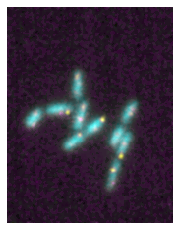

In [7]:
microim = microplot.microshow(images=multi_channel)

However we can easily adjust the color maps or lookup tables with the ```cmaps``` option where we can use any Matplotlib colormap or additionally ```pure_red```, ```pure_green```, ```pure_blue```, ```pure_cyan```, ```pure_yellow``` and ```pure_magenta``` which provide classic black-to-color color maps:

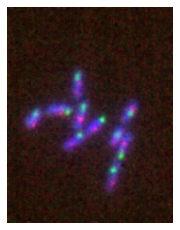

In [8]:
microim = microplot.microshow(images=multi_channel, cmaps=['pure_blue', 'pure_red', 'pure_green'])

### 2D Image inputs

As shown above, we can use a simple Numpy array as input. The dimension ordering is expected to be ```CXY``` i.e. ```Channel/X/Y```. You can use ```np.swapaxis``` or ```np.moveaxis``` for example to change the dimensions to match this requirement. If you pass a Numpy array, **all channels** are plotted and therefore you need to provide the corresponding number of color maps (if not using default RGB).

Alternatively you can also pass **lists of images**. This is useful if for example you don't want to plot all channels of a Numpy array. For example you could use the following to only plot two out of the three channels:

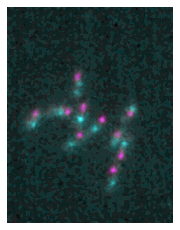

In [9]:
microim = microplot.microshow(images=[multi_channel[1], multi_channel[2]])

### 3D image inputs

You also have the possibility to represent 3D data as a projection (to reperesent 3D data as volumes, we recommend using [napari](https://napari.org/). In this case, you need to provide either a Numpy array of dimensions ```CZXY``` or a list of 3D images of dimensions ```ZXY```. As ```microshow``` cannot know if you want to plot multiple channels or a volume (both arrays have three dimensions), if you want to plot a volume you have two choices. You can pass an additional key-word ```volume_proj``` where you have the choices ```min```, ```max```, ```mean``` or you can use the ```volshow``` function which is identical to ```microshow``` but sets ```volume_proj='max'``` by default. As an example we load here the following dataset, composed of 20 time points, 11 slices and 2 channesl:

In [10]:
image3d = skimage.io.imread('../microfilm/dataset/tests/test_folders/coli_nucl_ori_3d.tif')
image3d.shape

(2, 20, 11, 200, 200)

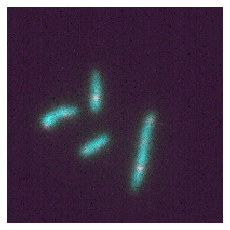

In [11]:
microplot.microshow(image3d[:,0,:,:,:], volume_proj='mean');

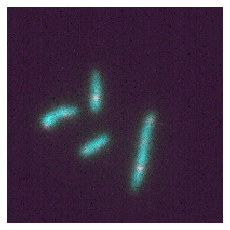

In [12]:
microplot.volshow(image3d[:,0,:,:,:]);

### Options at creation

When we create the image, we have a large set of options that we can use to adjust the plot. For example, in addition to selecting specific color maps with ```cmaps```, we can also choose a color projection type, add a scale bar and a label etc.:

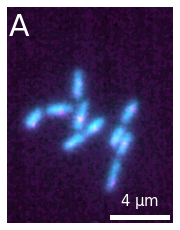

In [13]:
microim = microplot.microshow(images=[image1, image2], cmaps=['pure_cyan','pure_magenta'], proj_type='sum',
                              unit='um', scalebar_unit_per_pix=0.065, scalebar_size_in_units=4,
                              scalebar_font_size=15, scalebar_thickness=0.02,
                              label_text='A', label_font_size=30);

We can also add the channel labels as titles:

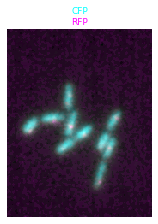

In [14]:
microim = microplot.microshow(images=[image1, image2], cmaps=['pure_cyan','pure_magenta'],
                              channel_label_show=True, channel_label_size=0.05,
                              channel_names=['CFP', 'RFP'])

### Colorbar

If you plot an image with a single channel, you can add a colorbar to your plot. The limits of intensities correspond to the limits usde during plotting and specified e.g. with the ```limits``` and ```rescale_type``` options:

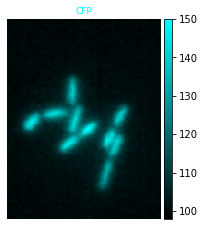

In [15]:
micro_colorbar = microplot.microshow(images=[image1], cmaps=['pure_cyan'],
                              channel_label_show=True, channel_label_size=0.05,
                              channel_names=['CFP'], show_colorbar=True)

## Microimage object

When calling ```microshow```, actually a ```Microimage``` instance is returned, which gives access to both specific functions of that instance as well as to the underlying Matplotlib objects.

### Microimage methods

In the examples above, we always passed *all* inputs at time of figure creation. Alternatively to this, one can also *first* create a ```Microimage``` object and *then* use its attached methods such as ```add_label```  and ```add_scalebar``` to modify the plot. This can make the code slightly more readable:

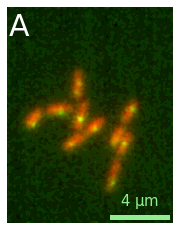

In [16]:
microim = microplot.microshow(images=[image1, image2], cmaps=['pure_red', 'pure_green'])
microim.add_scalebar(unit='um', scalebar_unit_per_pix=0.065, scalebar_size_in_units=4,
                     scalebar_color='lightgreen', scalebar_font_size=15)
microim.add_label(label_text='A', label_font_size=30);

### Relation to Matplotlib

In the same spirit as e.g. the seaborn library, the ```microplot``` module stays very close to Matplotlib, so that you can integrate the image plots into larger figures. There are two ways in which ```microplot``` and Matplotlib are related.

First, the ```Microimage``` object gives access to the ```axis``` of the figure which allows you to use *any* Matplotlib customization on your plot. For example, you can turn the axes back on:

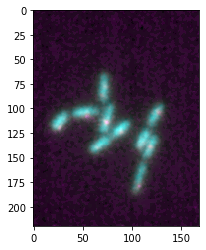

In [17]:
microim = microplot.microshow(images=[image1, image2])
microim.ax.set_axis_on()

Second, you can integrate and ```microplot``` in existing Matplotlib figures again by using the ```axis```. For that you can for example first create a subplot and **re-use** the axis reference as parameter in ```microshow``` to integrate the plot in that figure:

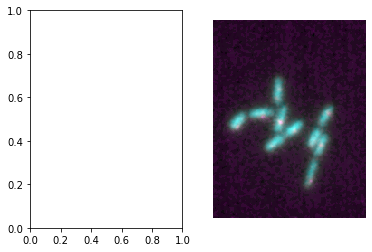

In [18]:
fig, ax = plt.subplots(1,2)
microim = microplot.microshow(images=[image1, image2], ax=ax[1]);

We can then of course use these approaches together. For example, we can first create Matplotlib ```subplots```, add the ```micrplot``` in that figure, and then add labels to each ```microplot```:

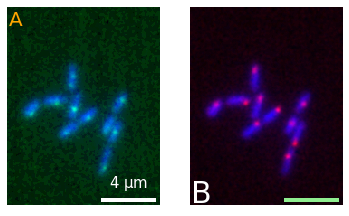

In [19]:
fig, ax = plt.subplots(1,2)
micro1 = microplot.microshow(images=[image1, image2], cmaps=['pure_blue', 'pure_green'],
                              scalebar_unit_per_pix=0.065, scalebar_size_in_units=4, unit='um', 
                    scalebar_font_size=15, scalebar_color='white', ax=ax[0]);
micro2 = microplot.microshow(images=[image1, image3], cmaps=['pure_blue', 'pure_red'],
                              scalebar_unit_per_pix=0.065, scalebar_size_in_units=4, unit='um',
                    scalebar_font_size=None, scalebar_color='lightgreen', ax=ax[1])#, scalebar_kwargs={'scale_loc':'top'});

micro1.add_label('A', label_location='upper left', label_font_size=20, label_color='orange')
micro2.add_label('B', label_location='lower left', label_font_size=30);

### Copying figures

Matplotlib makes it impossible to re-use a given plot in multiple figures. Once you have created a microplot with annotations you might however want to re-use it in another larger figure. The ```microimage``` object allows you to do that since it stores all the relevant information and can easily be recreated. For example let's create a plot:

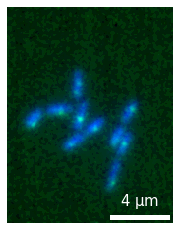

In [20]:
micro1 = microplot.microshow(images=[image1, image2], cmaps=['pure_blue', 'pure_green'],
                             scalebar_unit_per_pix=0.065, scalebar_size_in_units=4, unit='um',
                             scalebar_font_size=15, scalebar_color='white');

And now we create a new figure with ```plt.subplots()``` and we can add our plot from above to it using the ```update``` method:

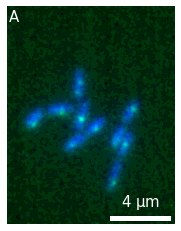

In [21]:
fig2, ax2 = plt.subplots()
newmicro1 = micro1.update(ax=ax2, copy=True)
newmicro1.add_label('A');

As an alternative to creating subplots yourself, you can also create a ```Micropanel``` object and add to it a series of microimages. Find more information in [this section](create_panels.ipynb).

## Lower level functions

When calling ```microshow```, several internal functions are used, e.g. to rescale the image intensity, combined multiple colormaps etc. You also have access to these functions individually from the ```colorify``` module.

In [22]:
from microfilm import colorify

### Convert image to display with chosen colormap

Using the ```colorify_by_name``` function, you can turn a single 2D array into a RGB image with a certain colormap. You can use any colormap from Matplotlib. Additionally, since Matplotlib doesn't offer plain colormaps from black to a given color (used very often in microcopy), you can also specify one of ```pure_green```, ```pure_red```, ```pure_blue```, ```pure_cyan```, ```pure_magenta```, ```pure_yellow```:

In [23]:
image2

array([[ 98,  99, 100, ..., 100, 100, 100],
       [ 99,  99,  99, ..., 100,  99,  99],
       [ 99,  98,  99, ...,  99,  99,  99],
       ...,
       [100, 100, 100, ...,  99,  99,  99],
       [100,  99,  99, ...,  99,  99,  99],
       [ 99,  99,  99, ...,  99, 100, 100]], dtype=uint16)

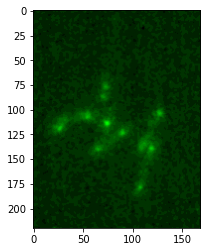

In [24]:
im_green, cmap, min_max = colorify.colorify_by_name(image2, cmap_name='pure_green', flip_map=False, rescale_type='min_max')
plt.imshow(im_green);

By default the image intensity is rescaled using the min-max values. This is often sub-optimal (e.g. if single pixels are way out of the distribution) and you can specify another rescaling. For example you can explicitly provide lower and upper limits:

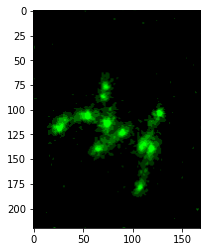

In [25]:
im_green, cmap, min_max = colorify.colorify_by_name(image2, cmap_name='pure_green', flip_map=False, rescale_type='limits',
                                       limits=[100,105])
plt.imshow(im_green);

### colormap hex

Alternatively to the keyword based map, you can also use a hexadecimal encoding of a color to create an colormap ranging from black to that color. This gives more flexibility:

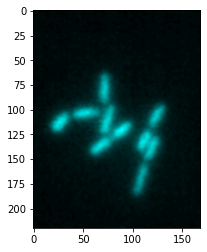

In [26]:
heximage, cmap, min_max = colorify.colorify_by_hex(image1, cmap_hex='#00ffff')
plt.imshow(heximage);

### Combining images

After having converted images to a given colormap, you can combine them into a single image with overlayed colors. Currently you can use a maximum projection (default) or a sum to replicate the Fiji behavior. You can simply use the ```combine_image``` function for that:

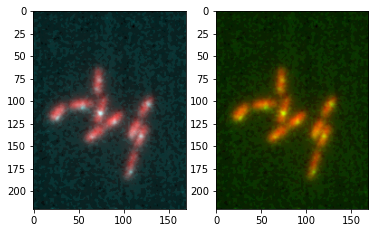

In [27]:
im1_mapped, _, _ = colorify.colorify_by_name(image1, cmap_name='pure_red')
im2_mapped, _, _ = colorify.colorify_by_hex(image2, cmap_hex='#00ffff')


im1_mapped_b, _, _ = colorify.colorify_by_name(image1, cmap_name='pure_red')
im2_mapped_b, _, _ = colorify.colorify_by_name(image2, cmap_name='pure_green')

combined = colorify.combine_image([im1_mapped, im2_mapped])
combined_b = colorify.combine_image([im1_mapped_b, im2_mapped_b])

fig, ax = plt.subplots(1,2)
ax[0].imshow(combined)
ax[1].imshow(combined_b);

In the plots below, we compare the two available projections, maximum and sum. The difference is mostly visible when using colormaps that have large overlap, e.g. here with ```summer``` and ```cool```. With ```pure_green``` and ```pure_red``` there would for example be no visual difference.

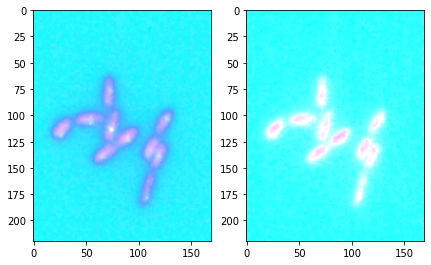

In [28]:
im1_mapped_b, _, _ = colorify.colorify_by_name(image1, cmap_name='cool')
im2_mapped_b, _, _ = colorify.colorify_by_name(image2, cmap_name='summer')

combined = colorify.combine_image([im1_mapped_b, im2_mapped_b], proj_type='max')
combined_b = colorify.combine_image([im1_mapped_b, im2_mapped_b], proj_type='sum')

fig, ax = plt.subplots(1,2, figsize=(7,7))
ax[0].imshow(combined)
ax[1].imshow(combined_b);

### Direct conversion

To save some steps you can also directly use a list of images and of colormaps to create a combined image:

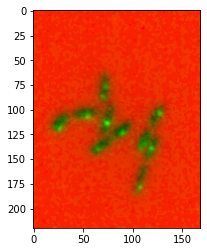

In [29]:
converted, _, _, _ = colorify.multichannel_to_rgb(images=[image1, image2], cmaps=['pure_red', 'pure_green'], flip_map=[True, False])
plt.imshow(converted);

Most of these functions also work directly with Numpy arrays:

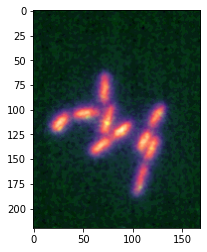

In [30]:
converted, _, _, _ = colorify.multichannel_to_rgb(images=[image1, image2], cmaps=['magma', 'pure_green'])
plt.imshow(converted);

## The scalebar

We have seen above, that you could add a scalebar to the image. These scalebars are added via the ```matplotlib-scalebar``` package.

The only parameters needed for the scalebar are the ```unit``` that you use e.g. um, the size per pixel ```unit_per_pixel``` e.g. 0.5um/pixels, and the size of the scale bar ```scalebar_size_in_units``` in your unit e.g. 40um. In addition you can pass options like ```scalebar_color``` or ```scalebar_font_size``` to adjust the rendering. Note that you can pass a dictionary ```scalebar_kwargs``` with all possible options avaialble in the original [```ScaleBar``` object](https://github.com/ppinard/matplotlib-scalebar#scalebar-arguments):

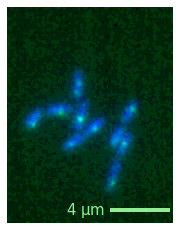

In [31]:
microim = microplot.microshow(images=[image1, image2], cmaps=['pure_blue', 'pure_green'],
                              unit='um', scalebar_unit_per_pix=0.065, scalebar_size_in_units=4,
                              scalebar_color='lightgreen', scalebar_font_size=15,
                              scalebar_kwargs={'scale_loc':'left'});

## Export

As the figure is simply a Matplotlib figure, you can just use the regular ```savefig``` function (and use [this trick](https://stackoverflow.com/a/27227718) to avoid white space around the plot). You could access it via ```microim.fig.savefig``` but we also directly wrap it here in the microim object:

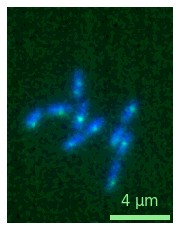

In [32]:
microim = microplot.microshow(images=[image1, image2], cmaps=['pure_blue', 'pure_green'],
                              unit='um', scalebar_unit_per_pix=0.065, scalebar_size_in_units=4,
                              scalebar_color='lightgreen', scalebar_font_size=15);
microim.savefig('single.png', bbox_inches = 'tight', pad_inches = 0, dpi=600)

And for more complex plots, you can just use the regular figure creation:

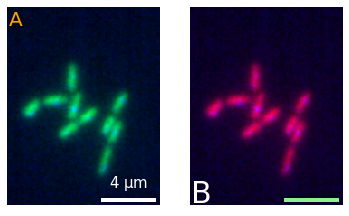

In [33]:
fig, ax = plt.subplots(1,2)
micro1 = microplot.microshow(images=[image1, image2], cmaps=['pure_green', 'pure_blue'],
                             scalebar_unit_per_pix=0.065, scalebar_size_in_units=4, unit='um',
                             scalebar_font_size=15, scalebar_color='white', ax=ax[0]);
micro2 = microplot.microshow(images=[image1, image2], cmaps=['pure_red', 'pure_blue'],
                             scalebar_unit_per_pix=0.065, scalebar_size_in_units=4, unit='um',
                             scalebar_font_size=None, scalebar_color='lightgreen', ax=ax[1]);

micro1.add_label('A', label_location='upper left', label_font_size=20, label_color='orange')
micro2.add_label('B', label_location='lower left', label_font_size=30);

In [34]:
fig.savefig('figure.png', bbox_inches = 'tight', pad_inches = 0, dpi=600)

In [35]:
fig.savefig('figure.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=600)